In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from util.data_prep import get_combined_libre_pump_data, combine_libre_readings

In [2]:
plt.style.use('seaborn')

In [3]:
data = pd.read_csv('data/SamDysch_glucose_2-5-2022.csv', skiprows=[0])
data.index = pd.to_datetime(data['Device Timestamp'], format="%d-%m-%Y %H:%M")

/home/sdysch/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
to_keep = [
    'Historic Glucose mmol/L',
    'Scan Glucose mmol/L',
]

data = data[to_keep]
data.head()

,Historic Glucose mmol/L,Scan Glucose mmol/L
Device Timestamp,,
2019-12-09 19:04:00,6.8,NaN
2019-12-09 19:20:00,7.6,NaN
2019-12-09 19:35:00,7.7,NaN
2019-12-09 19:50:00,7.2,NaN
2019-12-09 20:05:00,5.8,NaN


# Combine glucose readings

In [5]:
data['Libre glucose mmol/L'] = data.apply(lambda x: combine_libre_readings(x['Scan Glucose mmol/L'], x['Historic Glucose mmol/L']), axis='columns')
data = data.drop(['Historic Glucose mmol/L', 'Scan Glucose mmol/L'], axis='columns')

In [6]:
data

,Libre glucose mmol/L
Device Timestamp,
2019-12-09 19:04:00,6.8
2019-12-09 19:20:00,7.6
2019-12-09 19:35:00,7.7
2019-12-09 19:50:00,7.2
2019-12-09 20:05:00,5.8
...,...
2022-04-19 10:05:00,NaN
2022-04-19 20:18:00,NaN
2022-04-19 20:59:00,NaN


In [7]:
# drop NaNs
data = data.dropna()

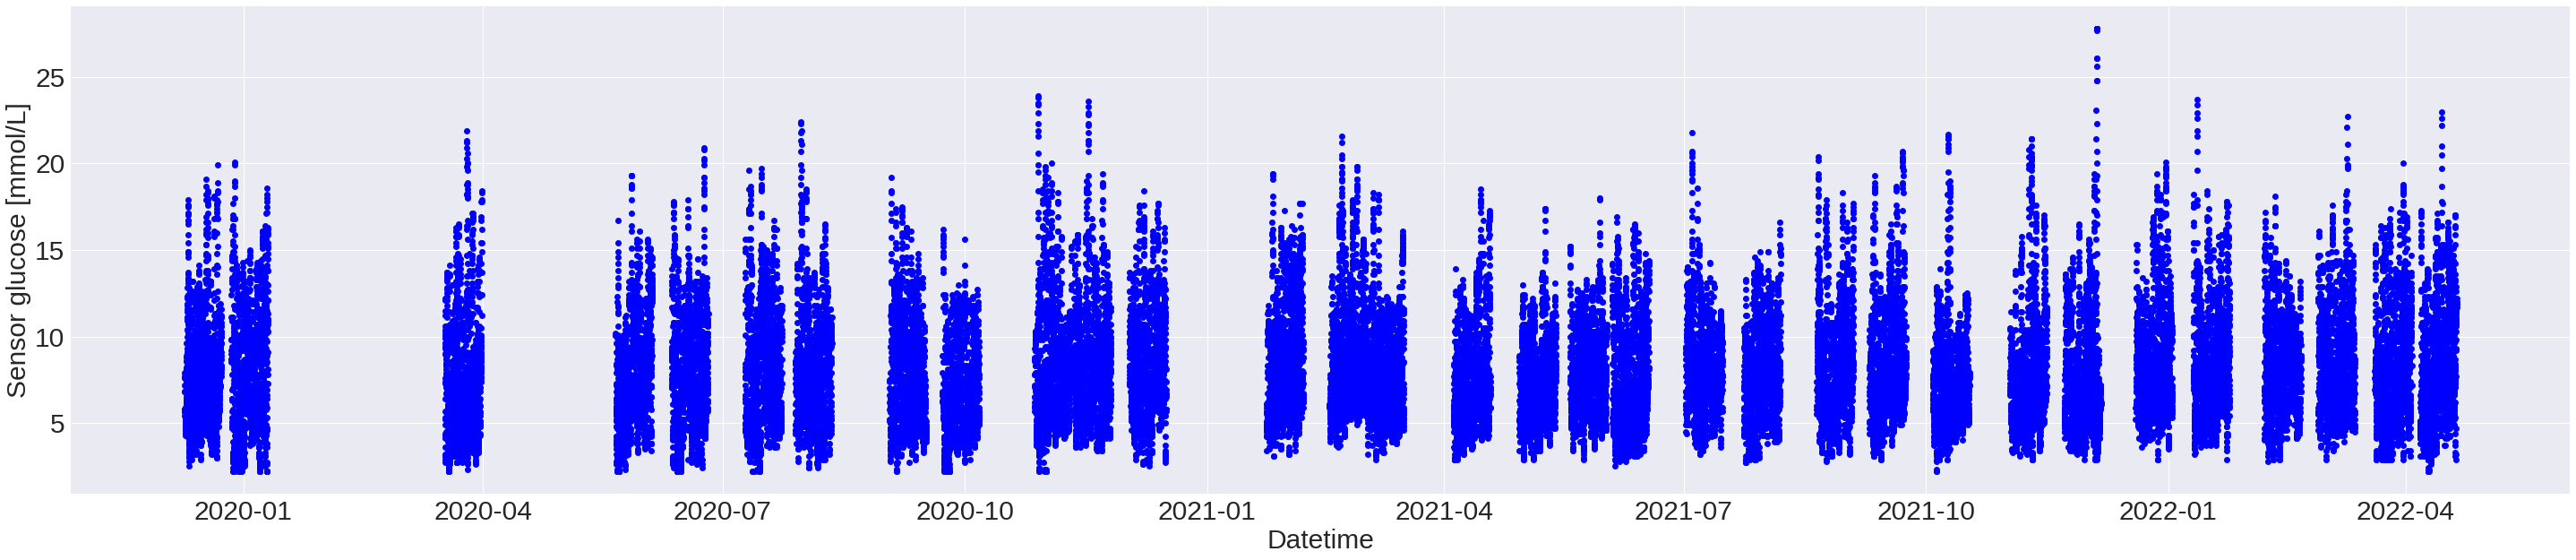

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(50, 10))
ax.plot(data['Libre glucose mmol/L'], 'bo')
ax.set_xlabel('Datetime', fontsize=30)
ax.set_ylabel('Sensor glucose [mmol/L]', fontsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)